In [2]:
import numpy as np

In [1]:
def mean_squared_error(y_hat, y):
    return np.sum((y_hat - y)**2)/y.size

In [4]:
y      = np.array([1,   2,   3,    4])
y_hat1 = np.array([1.2, 1.9, 2.9,  4.2]) 
mean_squared_error(y_hat1, y)

0.025000000000000022

In [6]:
y_hat2 = np.array([2.2, 0.9, 2.9,  5.2]) 
mean_squared_error(y_hat2, y)

1.0250000000000004

In [23]:
def cross_entropy_error(y_hat, y):
    return -np.sum(y*np.log(y_hat + 1e-7))

In [11]:
y = np.array([0, 1, 0, 0, 0])

In [24]:
y_hat1 = np.array([0.1, 0.7, 0.1, 0.1, 0])

In [27]:
cross_entropy_error(y_hat1, y)

0.3566748010815999

In [26]:
y_hat2 = np.array([0.7, 0.05, 0.05, 0.2, 0])

In [28]:
cross_entropy_error(y_hat2, y)

2.9957302735559908

In [29]:
import mnist

my_mnist = mnist.Mnist()

Done
Done
Done
Done
Pickle: dataset/mnist.pkl is being created.
Done.


In [30]:
(train_images, train_labels), (_, _) = my_mnist.load()

In [36]:
train_size = train_images.shape[0]
batch_size = 32


In [37]:
batch_mask = np.random.choice(train_size, batch_size)
print(batch_mask)

[50427 40534 29906 41290  8956 25127 45645 50648 35388 46412  1825 50880
 43775 37044 23823 21228 47835 23341 47817 29253 42366 38032 24516   499
 17938 40750 43103 46096 17899 49851  8680 25232]


In [32]:
train_size

60000

In [42]:
# for mini-batch training.
def cross_entropy_error(y_hat, y):
    batch_size = 1 if y_hat.ndim == 1 else y_hat.shape[0]
    return -np.sum(y*np.log(y_hat + 1e-7))/batch_size

In [40]:
y_hat_batch = np.array([ [0.2, 0.2, 0.3, 0.1, 0.2], [0.1, 0.1, 0.1, 0.1, 0.6]])
y_batch =     np.array([ [0,   0,   1,   0,    0],   [0,   0,   0,   0,   1]])

In [41]:
cross_entropy_error(y_hat_batch, y_batch)

0.8573989640459981

In [47]:
(0.1/10e-50)

1e+48

In [48]:
def numerical_diff(f, x):
    h = 10e-50
    return (f(x + h) - f(x))/h

In [50]:
def func(x):
    return x**2 + 0.1*x
    

In [51]:
numerical_diff(func, 0.8)

0.0

In [52]:
# more reasonable approximation
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h))/(2*h)

In [53]:
numerical_diff(func, 0.8)

1.6999999999994797

In [54]:
numerical_diff(func, 0.2)

0.49999999999994493

In [55]:
def func(x):
    return x[0]**2 + x[1]**2

def func_tmp1(x0):
    return x0**2 + 4.0**2

In [56]:
numerical_diff(func_tmp1, 3.0)

6.00000000000378

In [60]:
def func_tmp2(x1):
    return 3.0**2 + x1**2

In [61]:
numerical_diff(func_tmp2, 4.0)

7.999999999999119

## Numerical Gradient

In [2]:
import numpy as np

In [3]:
def func2(x):
    return x[0]**2 + x[1]**2

In [4]:
# partial derivatives when x0 = 3, x1 = 4

def func_tmp1(x0):
    return x0**2 + 4**2

def func_tmp2(x1):
    return 3**2 + x1**2

In [6]:
def _numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h))/(2*h)

In [1]:
def _numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) 
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val 
        
    return grad



In [7]:
_numerical_diff(func_tmp1, 3.0)

6.00000000000378

In [8]:
_numerical_diff(func_tmp2, 4.0)

7.999999999999119

In [5]:
_numerical_gradient(func2, np.array([3.0, 4.0]))


array([6., 8.])

In [9]:
def gradient_descent(f, init_x, lr=0.1, step_num = 100):
    x = init_x
    for i in range(step_num):
        grad = _numerical_gradient(f, x)
        x -= lr*grad  # x = x - lr*grad

    return x

In [21]:
init_x = np.array([2800.0, 1000.0])
# func2 = x0**2 + x1**2
gradient_descent(func2, init_x, step_num=10000, lr=0.001)

array([5.65680105e-06, 2.02028609e-06])

## SimpleNet

In [30]:
class SimpleNet:
    def __init__(self):
        self.w = np.random.randn(2, 3)


    # for multi-dimensional x
    def softmax(self, x):
        if x.ndim == 2:
            x = x.T
            x = x - np.max(x, axis=0)
            y = np.exp(x) / np.sum(np.exp(x), axis=0)
            return y.T 

        x = x - np.max(x)  
        return np.exp(x) / np.sum(np.exp(x))


    def cross_entroy_error(self, y, t):
        delta = 1e-7
        batch_size = 1 if y.ndim == 1 else y.shape[0]

        return -np.sum(t*np.log(y + delta)) / batch_size


    # for multi-dimensional x
    def numerical_gradient(self, f, x):
        h = 1e-4 # 0.0001
        grad = np.zeros_like(x)
        
        it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
        while not it.finished:
            idx = it.multi_index
            tmp_val = x[idx]
            x[idx] = float(tmp_val) + h
            fxh1 = f(x) # f(x+h)
            
            x[idx] = tmp_val - h 
            fxh2 = f(x) # f(x-h)
            grad[idx] = (fxh1 - fxh2) / (2*h)
            
            x[idx] = tmp_val 
            it.iternext()   
            
        return grad


    def predict(self, x):
        return np.dot(x, self.w)
    

    def loss(self, x, y):
        z = self.predict(x)
        y_hat = self.softmax(z)
        loss = self.cross_entroy_error(y_hat, y)

        return loss

In [31]:
# let's test SimpleNet
net = SimpleNet()
print(net.w)

[[ 0.68927577 -1.11643295 -0.13601282]
 [ 0.60219774  0.58673274 -1.60266364]]


In [24]:
x = np.array([0.7, 0.19])
p = net.predict(x)
print(p)

[-1.16565823e-01  6.67160157e-01  3.27396510e-04]


In [25]:
np.argmax(p)

1

In [26]:
y = np.array([0, 1, 0])
net.loss(x, y)

0.6780501115099065

In [27]:
y = np.array([0, 0, 1])
net.loss(x, y)

1.3448826849923987

In [28]:
def loss_function(w):
    return net.loss(x, y)

In [32]:
dw = net.numerical_gradient(loss_function, net.w)
print(dw)

[[ 0.42403234  0.1194473  -0.54347965]
 [ 0.11509449  0.03242141 -0.1475159 ]]


In [33]:
# using lamda
loss_function = lambda w: net.loss(x, y)

In [34]:
dw = net.numerical_gradient(loss_function, net.w)
print(dw)

[[ 0.42403234  0.1194473  -0.54347965]
 [ 0.11509449  0.03242141 -0.1475159 ]]


## TwoLayerNet class

In [36]:
class Activations:
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    # for multi-dimensional x
    def softmax(self, x):
        if x.ndim == 2:
            x = x.T
            x = x - np.max(x, axis=0)
            y = np.exp(x) / np.sum(np.exp(x), axis=0)
            return y.T 

        x = x - np.max(x)  
        return np.exp(x) / np.sum(np.exp(x))


In [39]:
class Errors:
    def cross_entroy_error(self, y, t):
        delta = 1e-7
        batch_size = 1 if y.ndim == 1 else y.shape[0]

        return -np.sum(t*np.log(y + delta)) / batch_size

In [42]:
import activations
import errors

In [60]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}

        self.params['w1'] = weight_init_std*np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)

        self.params['w2'] = weight_init_std*np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        self.activations = activations.Activations()
        self.errors = errors.Errors()

    def predict(self, x):
        w1, w2 = self.params['w1'], self.params['w2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, w1) + b1
        z1 = self.activations.sigmoid(a1)
        a2 = np.dot(z1, w2) + b2
        y = self.activations.softmax(a2)

        return y
    
    def loss(self, x, y):
        y_hat = self.predict(x)

        return self.errors.cross_entropy_error(y_hat, y)
    

    def accuracy(self, x, y):
        y_hat = self.predict(x)
        p = np.argmax(y_hat, axis=1)
        y_p = np.argmax(y, axis=1)

        return np.sum(p == y_p)/float(x.shape[0])
    

    # for multi-dimensional x
    def _numerical_gradient(self, f, x):
        h = 1e-4 # 0.0001
        grad = np.zeros_like(x)
        
        it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
        while not it.finished:
            idx = it.multi_index
            tmp_val = x[idx]
            x[idx] = float(tmp_val) + h
            fxh1 = f(x) # f(x+h)
            
            x[idx] = tmp_val - h 
            fxh2 = f(x) # f(x-h)
            grad[idx] = (fxh1 - fxh2) / (2*h)
            
            x[idx] = tmp_val 
            it.iternext()   
            
        return grad
    

    def numerical_gradient(self, x, y):
        loss_w = lambda w: self.loss(x, y)

        grads = {}
        grads['w1'] = self._numerical_gradient(loss_w, self.params['w1'])
        grads['b1'] = self._numerical_gradient(loss_w, self.params['b1'])
        grads['w2'] = self._numerical_gradient(loss_w, self.params['w2'])
        grads['b2'] = self._numerical_gradient(loss_w, self.params['b2'])

        return grads
    

## Train TwoLayerNet

In [7]:
import mnist
from two_layer_net import TwoLayerNet

import matplotlib.pyplot as plt
import numpy as np

In [2]:
my_mnist = mnist.Mnist()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


In [3]:
(x_train, y_train), (x_test, y_test) = my_mnist.load()

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [11]:

network = TwoLayerNet(input_size=28*28, hidden_size=100, output_size=10)

In [12]:
network.params

{'w1': array([[ 0.00691821, -0.00766628,  0.0011048 , ..., -0.01444509,
         -0.02096234, -0.00539125],
        [ 0.02158764, -0.00461593, -0.01653164, ..., -0.01917657,
          0.00191896, -0.00962898],
        [ 0.00196323, -0.00159347, -0.02317298, ...,  0.00037187,
         -0.00677226, -0.00200744],
        ...,
        [-0.00456412, -0.01142783,  0.00240188, ...,  0.01069273,
         -0.01019897, -0.00378351],
        [ 0.00144244,  0.01231268,  0.00395283, ..., -0.0180285 ,
         -0.00639699, -0.00790048],
        [-0.01467352, -0.00049144, -0.01761132, ...,  0.00548518,
          0.01314084,  0.00341427]]),
 'b1': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [19]:
iterations = 10 #10000
train_size = x_train[:100].shape[0]
batch_size = 2 #100
lr = 0.1

iter_per_ecoph = max(train_size/batch_size, 1)


In [20]:
train_losses = []
train_accs = []
test_accs = []


In [21]:
for i in range(iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]

    grads = network.numerical_gradient(x_batch, y_batch)

    for key in ('w1', 'b1', 'w2', 'b2'):
        network.params[key] -= lr*grads[key]

    ## this is for plotting losses over time
    train_losses.append(network.loss(x_batch, y_batch))

    if i%iter_per_ecoph == 0:
        train_acc = network.accuracy(x_train, y_train)
        train_accs.append(train_acc)
        test_acc = network.accuracy(x_test, y_test)
        test_accs.append(test_acc)
        print(f'train acc, test_acc : {train_acc}, {test_acc}')
    

train acc, test_acc : 0.11236666666666667, 0.1135


KeyboardInterrupt: 

In [ ]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_accs))
plt.plot(x, train_accs, label='train acc')
plt.plot(x, test_accs, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


## Backpropagation

In [19]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx


class Sigmoid:
    def __init__(self):
        self.out = None
        self.activations = Activations()

    def forward(self, x):
        out = self.activations.sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx


class Affine:
    def __init__(self, w, b):
        self.w = w
        self.b = b
        
        self.x = None
        self.original_x_shape = None

        self.dw = None
        self.db = None

    def forward(self, x):
        # 
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.w) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.w.T)
        self.dw = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)  
        return dx


class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None 
        self.y_hat = None    
        self.y = None    
        self.activations = Activations()
        self.errors = Errors()
        
    def forward(self, x, y):
        self.y = y
        self.y_hat = self.activations.softmax(x)
        self.loss = self.errors.cross_entropy_error(self.y_hat, self.y)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.y.shape[0]
        #if self.y.size == self.y_hat.size: # one hot encoding
        
        dx = (self.y_hat - self.y) / batch_size
        
        """
        else:
            dx = self.y_hat.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        """
        return dx

### Two Layer Net with Backpropagation

In [20]:
import numpy as np
from activations import Activations
from errors import Errors

In [21]:
from collections import OrderedDict

In [22]:
class TwoLayerNetWithBackProp:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}

        self.params['w1'] = weight_init_std*np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)

        self.params['w2'] = weight_init_std*np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        self.activations = Activations()
        self.errors = Errors()

        # add layers
        self.layers = OrderedDict()
        self.update_layers()
        self.last_layer = SoftmaxWithLoss()


    def update_layers(self):
        self.layers['Affine1'] = Affine(self.params['w1'], self.params['b1'])
        self.layers['Rele1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['w2'], self.params['b2'])


    def predict(self, x):
        ## new implementation for backprop
        for layer in self.layers.values():
            x = layer.forward(x)

        y = x
        return y
    
    def loss(self, x, y):
        y_hat = self.predict(x)

        # return self.errors.cross_entropy_error(y_hat, y)
        return self.last_layer.forward(y_hat, y)

    def accuracy(self, x, y):
        y_hat = self.predict(x)
        p = np.argmax(y_hat, axis=1)
        y_p = np.argmax(y, axis=1)

        return np.sum(p == y_p)/float(x.shape[0])
    

    def gradient(self, x, y):
        self.loss(x, y)

        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        grads['w1'] = self.layers['Affine1'].dw
        grads['b1'] = self.layers['Affine1'].db
        grads['w2'] = self.layers['Affine2'].dw
        grads['b2'] = self.layers['Affine2'].db
      
        return grads

In [23]:
from mnist import Mnist

In [24]:
mnist = Mnist()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


In [25]:
(x_train, y_train), (x_test, y_test) = mnist.load()

In [26]:
print(x_train.shape)

(60000, 784)


In [27]:
network = TwoLayerNetWithBackProp(input_size=28*28, hidden_size=100, output_size=10)

In [28]:
iterations = 10000
train_size = x_train.shape[0]
batch_size = 100
lr = 0.1

iter_per_ecoph = max(train_size/batch_size, 1)


In [29]:
train_losses = []
train_accs = []
test_accs = []

In [30]:
for i in range(iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]

    grads = network.gradient(x_batch, y_batch)

    for key in ('w1', 'b1', 'w2', 'b2'):
        network.params[key] -= lr*grads[key]

    ## this is for plotting losses over time
    train_losses.append(network.loss(x_batch, y_batch))

    if i%iter_per_ecoph == 0:
        train_acc = network.accuracy(x_train, y_train)
        train_accs.append(train_acc)
        test_acc = network.accuracy(x_test, y_test)
        test_accs.append(test_acc)
        print(f'train acc, test_acc : {train_acc}, {test_acc}')
    

train acc, test_acc : 0.16175, 0.1613
train acc, test_acc : 0.9056833333333333, 0.9113
train acc, test_acc : 0.9257833333333333, 0.9269
train acc, test_acc : 0.9396666666666667, 0.9374
train acc, test_acc : 0.9482833333333334, 0.9462
train acc, test_acc : 0.9549333333333333, 0.9526
train acc, test_acc : 0.9605166666666667, 0.9569
train acc, test_acc : 0.9647833333333333, 0.9592
train acc, test_acc : 0.9683, 0.9632
train acc, test_acc : 0.9696833333333333, 0.9659
train acc, test_acc : 0.9724333333333334, 0.968
train acc, test_acc : 0.97555, 0.9717
train acc, test_acc : 0.9776666666666667, 0.972
train acc, test_acc : 0.9792166666666666, 0.9736
train acc, test_acc : 0.98005, 0.9738
train acc, test_acc : 0.9816333333333334, 0.973
train acc, test_acc : 0.9835833333333334, 0.9749


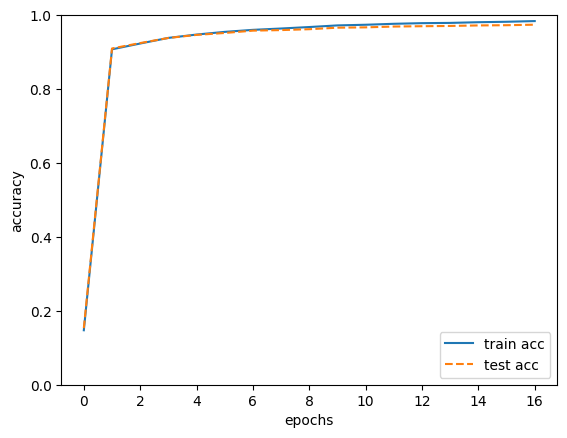

In [45]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_accs))
plt.plot(x, train_accs, label='train acc')
plt.plot(x, test_accs, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [54]:
import numpy as np
import pickle

my_weight_pkl_file = 'jaerock_weights.pkl'

In [55]:


with open(f'{my_weight_pkl_file}', 'wb') as f:
    print(f'Pickle: {my_weight_pkl_file} is being created.')
    pickle.dump(network.params, f)
    print('Done.') 


Pickle: jaerock_weights.pkl is being created.
Done.


In [56]:
network.params = None

### Using your own TwoLayerNet model

In [9]:
network = TwoLayerNetWithBackProp(input_size=28*28, hidden_size=100, output_size=10)

In [ ]:
with open(f'{my_weight_pkl_file}', 'rb') as f:
    network.params = pickle.load(f)

network.update_layers()

In [12]:
from mnist import Mnist

In [14]:
mnist = Mnist()
(_, _), (x_test, y_test) = mnist.load()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


In [58]:
y_hat = network.predict(x_test[0:100])


In [29]:
import matplotlib.pyplot as plt

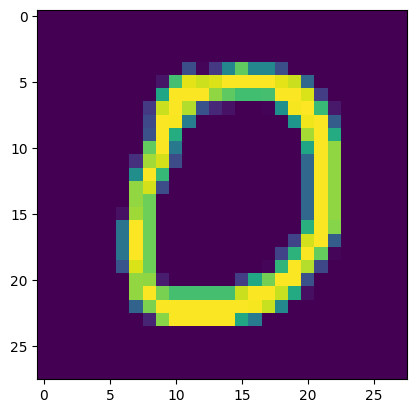

In [53]:
plt.imshow(x_test[10].reshape(28,28))

In [49]:
y_hat[10]

array([12.53958264, -6.30247869,  3.96667689, -2.86688026, -7.46816745,
        1.39351808,  1.00439998, -0.74908079, -1.66393792,  0.62830638])

In [59]:
y_hat[10]

array([12.53958264, -6.30247869,  3.96667689, -2.86688026, -7.46816745,
        1.39351808,  1.00439998, -0.74908079, -1.66393792,  0.62830638])

In [51]:
np.argmax(y_hat[10])

0

In [52]:
np.argmax(y_test[10])

0